WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [p, q, theta]
>BinaryGibbsMetropolis: [true_binding_site]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


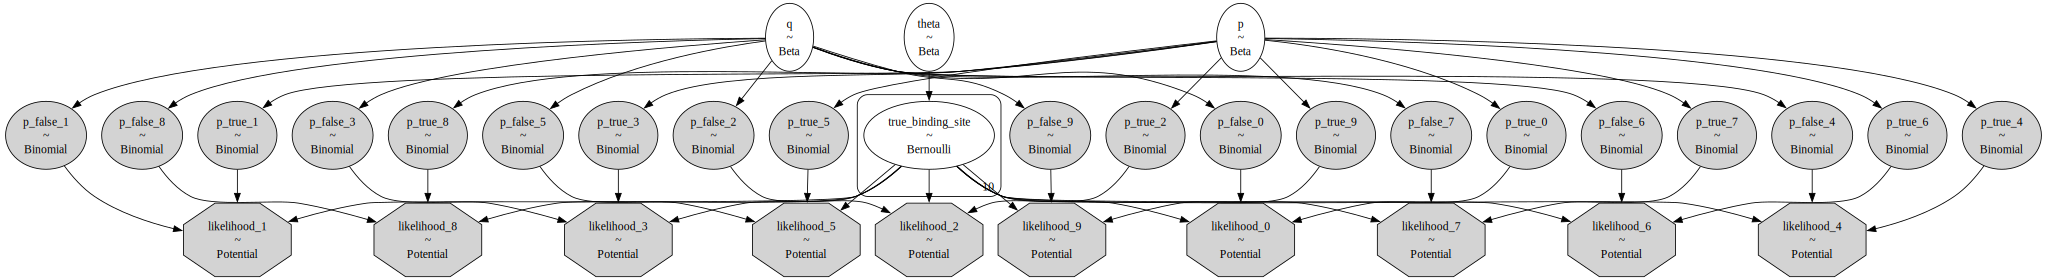

In [2]:
import pymc as pm
import numpy as np
import arviz as az


observed_peaks = np.array([5, 3, 7, 2, 8, 4, 6, 5, 3, 7])
total_replicates = np.array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

with pm.Model() as model:
    # Prior for the probability of a peak in a true binding site
    p = pm.Beta('p', alpha=1, beta=1)  # Uninformative prior

    # Prior for the probability of a peak in a non-binding site (false positive)
    q = pm.Beta('q', alpha=1, beta=1)  # Uninformative prior

    # Prior for the probability of a region being a true binding site
    theta = pm.Beta('theta', alpha=1, beta=1)  # Uninformative prior

    # Latent variable for each region's true state
    true_binding_site = pm.Bernoulli('true_binding_site', p=theta, shape=len(observed_peaks))

    # Likelihood for each region
    for i in range(len(observed_peaks)):
        # The probability of observing the data under the hypothesis that it's a true binding site
        p_true = pm.Binomial('p_true_{}'.format(i), n=total_replicates[i], p=p, observed=observed_peaks[i])

        # The probability of observing the data under the hypothesis that it's a false positive
        p_false = pm.Binomial('p_false_{}'.format(i), n=total_replicates[i], p=q, observed=observed_peaks[i])

        # Combine the probabilities based on the latent true/false state
        pm.Potential('likelihood_{}'.format(i), pm.math.switch(true_binding_site[i], p_true, p_false))

    # Inference
    trace = pm.sample(1000, tune=1000, target_accept=0.95)

graph = pm.model_to_graphviz(model)
graph.render(filename='model_graph', format='png', cleanup=True)  # This saves and renders the graph as a PNG image
graph

In [3]:
summary = az.summary(trace)
print(summary)

                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
true_binding_site[0]  0.487  0.500   0.000    1.000      0.015    0.011   
true_binding_site[1]  0.497  0.500   0.000    1.000      0.016    0.011   
true_binding_site[2]  0.486  0.500   0.000    1.000      0.016    0.012   
true_binding_site[3]  0.492  0.500   0.000    1.000      0.016    0.011   
true_binding_site[4]  0.489  0.500   0.000    1.000      0.015    0.011   
true_binding_site[5]  0.498  0.500   0.000    1.000      0.015    0.011   
true_binding_site[6]  0.484  0.500   0.000    1.000      0.016    0.012   
true_binding_site[7]  0.493  0.500   0.000    1.000      0.016    0.011   
true_binding_site[8]  0.480  0.500   0.000    1.000      0.016    0.011   
true_binding_site[9]  0.488  0.500   0.000    1.000      0.016    0.011   
p                     0.497  0.049   0.403    0.586      0.001    0.001   
q                     0.499  0.049   0.404    0.587      0.001    0.001   
theta                 0.4